In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
bootPath="/mnt/scratch7/avi/test/shoal-paper/salmonData/real_boot/COPD_1full/aux_info/"
gibbsPath="/mnt/scratch7/avi/test/shoal-paper/salmonData/real_gibbs/COPD_1full/aux_info/"

In [3]:
bootFiles=[bootPath+str(x)+'.sf' for x in range(1,101)]
gibbsFiles=[gibbsPath+str(x)+'.sf' for x in range(1,101)]

In [4]:
def readFiles(paths):
    for index, path in enumerate(paths):
        with open(path) as f:
            if index == 0:
                tpm = pd.read_table(f, header=0).set_index("Name").rename(columns={'TPM': '0'}).drop(['Length','EffectiveLength','NumReads'], 1)
            else:
                tpm[index] = pd.read_table(f, header=0).set_index("Name").drop(['Length','EffectiveLength','NumReads'], 1)
    return tpm
def readTruth(tfile):
    with open(tfile) as f:
        tpm = pd.read_table(f, header=0).set_index("Name")['TPM']
    return tpm
def dist_is_between(dist, truth):
    dist = sorted(dist)
    is_bet = []
    for skip in range(1, 25):
        if dist[skip] <= truth and truth <=dist[-(skip+1)]:
            is_bet.append(True)
        else:
            is_bet.append(False)
    return is_bet
def get_bet(var):
    bet = []
    for txp in var.index:
        dist = var.loc[txp]
        truth = truthData[txp]
        bet.append(dist_is_between(dist, truth))
    return bet
def get_series(df):
    series = []
    for txp in df.index:
        dist = sorted(df.loc[txp])
        cv=[]
        for skip in range(1, 25):
            ndist = np.array(dist[skip:-skip])
            cv.append(ndist.std()/ndist.mean())
        series.append(cv)
    return series

In [5]:
bootData = readFiles(bootFiles)
gibbsData = readFiles(gibbsFiles)

In [6]:
b = bootData
g = gibbsData

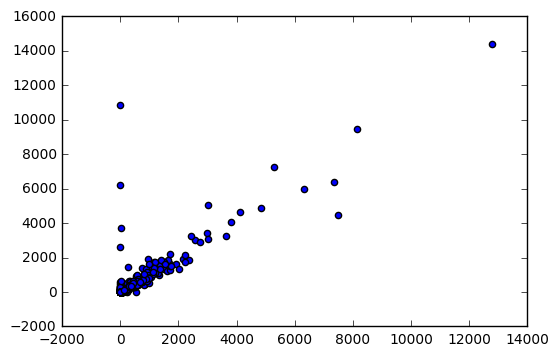

In [21]:
plt.scatter(b.var(1),g.var(1))

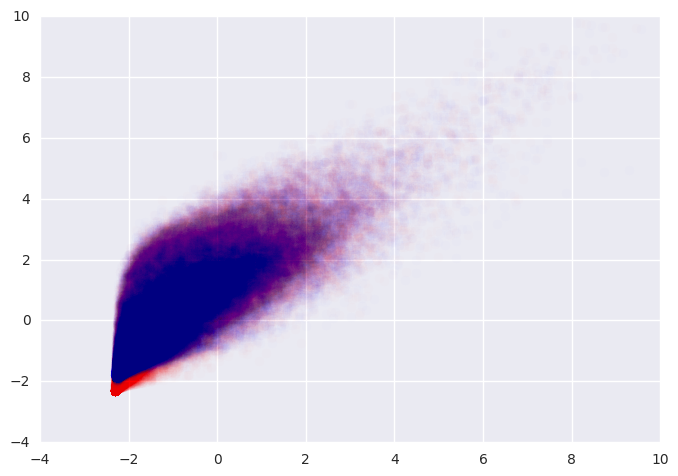

In [120]:
plt.plot(np.log(b.var(1)+0.1),np.log(b.mean(1)+0.1), 'ro', alpha=0.009, label='boot')
plt.plot(np.log(g.var(1)+0.1),np.log(g.mean(1)+0.1), 'bo', alpha=0.009, label='gibbs')

In [57]:
M40 = (b.median(1)<2) & (g.median(1)>40)

In [107]:
V40 = (b.var(1)<2) & (g.var(1)>40)

In [104]:
x = 'ENST00000562993.5|ENSG00000137876.9|OTTHUMG00000131957.3|OTTHUMT00000419668.1|RSL24D1-002|RSL24D1|940|UTR5:1-24|CDS:25-276|UTR3:277-940|'
g.loc[x].values

array([ 105.64748464,  106.06970576,  103.42078171,  105.98759167,
        100.41432716,  103.23883906,   97.82522735,  111.45656711,
        105.73443261,  114.98734012,  101.28463335,  108.41997496,
         97.27397869,  104.52311335,  114.64418477,  111.0959219 ,
        106.11220418,  106.99850301,  105.3509363 ,  102.01478947,
        102.94554217,  105.35431678,  104.72001926,  106.78430003,
        111.17076272,  111.13561691,  106.11492655,  100.75906663,
        106.24415362,   99.95368311,  107.38779068,   93.15196551,
        110.38694389,  112.80884603,  106.58041244,   97.24734914,
        109.82704155,   99.28050491,  110.74671691,  105.2182753 ,
        105.32323299,  105.74389278,   92.48458743,  110.01902066,
        108.22650793,   97.08798453,  106.7966623 ,  112.78405514,
         96.75917791,  102.74671969,  102.78989328,  101.62842444,
        103.0085649 ,  115.44370732,  104.98247596,   98.76383365,
        101.45789449,  102.86371403,  109.97287362,   99.19881

(array([  1.,   3.,   2.,  14.,  12.,  20.,  26.,  10.,   6.,   6.]),
 array([  88.66000818,   91.33837809,   94.016748  ,   96.69511792,
          99.37348783,  102.05185775,  104.73022766,  107.40859758,
         110.08696749,  112.7653374 ,  115.44370732]),
 <a list of 10 Patch objects>)

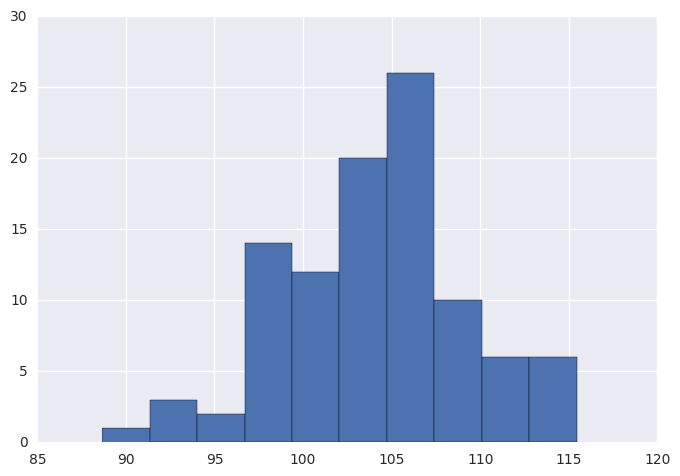

In [105]:
plt.hist(g.loc[x].values)

(array([ 16.,  37.,   0.,  24.,  11.,   4.,   4.,   0.,   2.,   2.]),
 array([ 0.        ,  0.0752743 ,  0.1505486 ,  0.22582289,  0.30109719,
         0.37637149,  0.45164579,  0.52692009,  0.60219438,  0.67746868,
         0.75274298]),
 <a list of 10 Patch objects>)

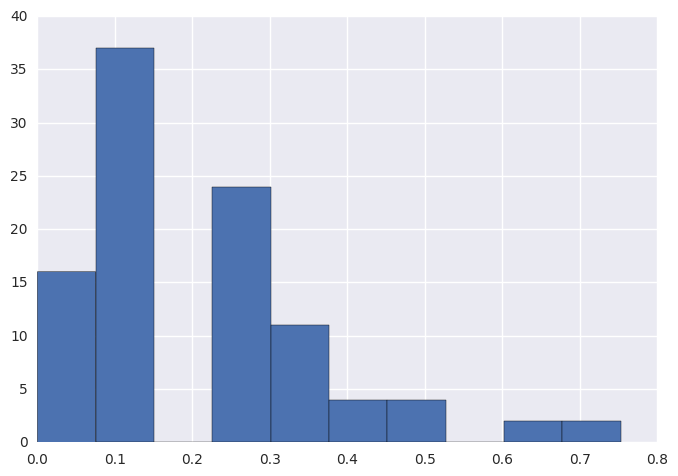

In [106]:
plt.hist(b.loc[x].values)

In [108]:
sum(V40)

26

In [51]:
bmid = b.median(1)
gmid = g.median(1)

In [80]:
from collections import defaultdict
# count = defaultdict(int)
count = []
names= []
for x in bmid.index:
    diff = gmid[x] - bmid[x]
#     count[diff] += 1
    if -5 < diff and diff < 5:
        continue
    else:
        t = diff/max(gmid[x],bmid[x])
        if t == 1:
            names.append(x)
        count.append(t)

(array([  11.,    6.,    3.,    2.,    4.,    3.,    3.,    5.,    1.,
           2.,    2.,    3.,    2.,    3.,    1.,    7.,    3.,    5.,
           3.,    4.,    8.,    5.,    5.,    6.,    9.,    5.,    4.,
           6.,   10.,   16.,   12.,   10.,   11.,    9.,   14.,   11.,
          11.,   16.,   18.,   16.,   20.,   19.,   25.,   26.,   30.,
          32.,   31.,   47.,   64.,  156.,    6.,   14.,   12.,    5.,
          11.,    5.,   10.,    7.,   16.,    3.,    5.,    9.,   20.,
           5.,   13.,   16.,   17.,   10.,    7.,    6.,    8.,   10.,
          11.,   13.,    7.,    9.,    4.,   13.,    9.,    9.,    5.,
           7.,    5.,    5.,   11.,    7.,    7.,    7.,   11.,   11.,
          11.,    8.,   14.,    8.,    8.,   16.,   12.,   12.,   14.,   69.]),
 array([ -9.99213763e-01,  -9.79221625e-01,  -9.59229487e-01,
         -9.39237350e-01,  -9.19245212e-01,  -8.99253074e-01,
         -8.79260937e-01,  -8.59268799e-01,  -8.39276662e-01,
         -8.19284524e-01

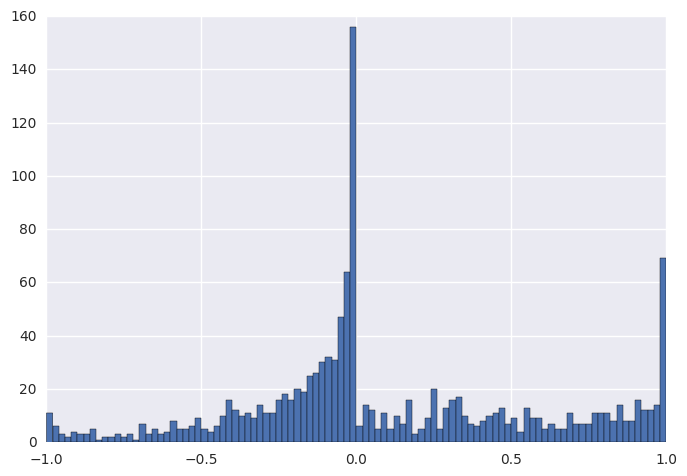

In [77]:
plt.hist(count, bins=100)

In [86]:
names

['ENST00000447124.1|ENSG00000115884.10|OTTHUMG00000090751.4|OTTHUMT00000323933.1|SDC1-004|SDC1|591|UTR5:1-227|CDS:228-314|UTR3:315-591|',
 'ENST00000447619.5|ENSG00000228474.5|OTTHUMG00000151990.4|OTTHUMT00000324705.2|OST4-002|OST4|458|UTR5:1-50|CDS:51-164|UTR3:165-458|',
 'ENST00000430763.5|ENSG00000057935.13|OTTHUMG00000150452.5|OTTHUMT00000318152.1|MTA3-010|MTA3|758|UTR5:1-5|CDS:6-281|UTR3:282-758|',
 'ENST00000419370.5|ENSG00000169599.12|OTTHUMG00000152668.6|OTTHUMT00000327352.1|NFU1-006|NFU1|664|UTR5:1-84|CDS:85-213|UTR3:214-664|',
 'ENST00000457793.6|ENSG00000115165.9|OTTHUMG00000154551.6|OTTHUMT00000333155.2|CYTIP-002|CYTIP|845|UTR5:1-78|CDS:79-264|UTR3:265-845|',
 'ENST00000457335.5|ENSG00000168385.17|OTTHUMG00000133394.12|OTTHUMT00000323212.1|SEPT2-022|SEPT2|570|UTR5:1-99|CDS:100-342|UTR3:343-570|',
 'ENST00000424991.1|ENSG00000144635.8|OTTHUMG00000130750.3|OTTHUMT00000342173.2|DYNC1LI1-006|DYNC1LI1|666|UTR5:1-88|CDS:89-666|',
 'ENST00000497391.5|ENSG00000180353.10|OTTHUMG0000

In [87]:
bmid['ENST00000447124.1|ENSG00000115884.10|OTTHUMG00000090751.4|OTTHUMT00000323933.1|SDC1-004|SDC1|591|UTR5:1-227|CDS:228-314|UTR3:315-591|']

0.0

In [97]:
gibbsData.loc[u'ENST00000447124.1|ENSG00000115884.10|OTTHUMG00000090751.4|OTTHUMT00000323933.1|SDC1-004|SDC1|591|UTR5:1-227|CDS:228-314|UTR3:315-591|']

0     17.120692
1     10.335175
2      8.383807
3      7.382292
4     12.377924
5     13.117396
6     13.088461
7     14.352338
8      9.041873
9     17.573242
10    10.897738
11    14.574507
12    18.996837
13    11.452504
14     7.329858
15     9.191411
16    11.227982
17    15.524114
18    14.070146
19    10.217731
20    15.520839
21     9.527546
22    11.259744
23    14.067820
24    11.370759
25    23.728604
26    15.222449
27    12.323872
28    21.550149
29    24.384490
        ...    
70    14.160254
71     0.035356
72    12.294181
73     4.594141
74     5.671853
75    17.489621
76     9.671480
77    11.578965
78     7.455662
79    14.039117
80    13.062785
81    20.084690
82    14.953528
83    18.303023
84    17.136692
85     5.707522
86     1.770110
87     5.967330
88     9.953446
89     8.754754
90     1.922914
91    10.555268
92    16.441479
93    17.145804
94    20.189915
95     9.298295
96     9.197405
97    13.396454
98     8.018757
99    13.815824
Name: ENST00000447124.1|

In [89]:
len(names)

54

In [94]:
gibbsData['ENST00000335137.3|ENSG00000186092.4|OTTHUMG00000001094.2|OTTHUMT00000003223.2|OR4F5-001|OR4F5|918|CDS:1-918|']

KeyError: 'ENST00000335137.3|ENSG00000186092.4|OTTHUMG00000001094.2|OTTHUMT00000003223.2|OR4F5-001|OR4F5|918|CDS:1-918|'